In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()
df = iris.data
target = iris.target
#target=target[{'0':'setosa', '1':'versicolar', '2':'virginica'}]

IndexError: ignored

In [3]:
#first data scaling
X_scaled = StandardScaler().fit_transform(df)
X_scaled[:5]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
#covariance matrix
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [5]:
#eigen vectors
values, vectors = np.linalg.eig(cov_matrix)
vectors[:5]

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [6]:
#explained variances
explained_variances = []
for i in range(len(values)):
  explained_variances.append(values[i] / np.sum(values))

In [7]:
explained_variances

[0.7296244541329987,
 0.2285076178670177,
 0.03668921889282871,
 0.005178709107154867]

In [8]:
print(np.sum(explained_variances), '\n' , explained_variances)

1.0 
 [0.7296244541329987, 0.2285076178670177, 0.03668921889282871, 0.005178709107154867]


In [9]:
pcomponent_1 = X_scaled.dot(vectors.T[0])
pcomponent_2 = X_scaled.dot(vectors.T[1])

In [10]:
res = pd.DataFrame(pcomponent_1, columns=['PC1'])
res['PC2'] = pcomponent_2
res['Y'] = target
res.head()

,PC1,PC2,Y
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '')

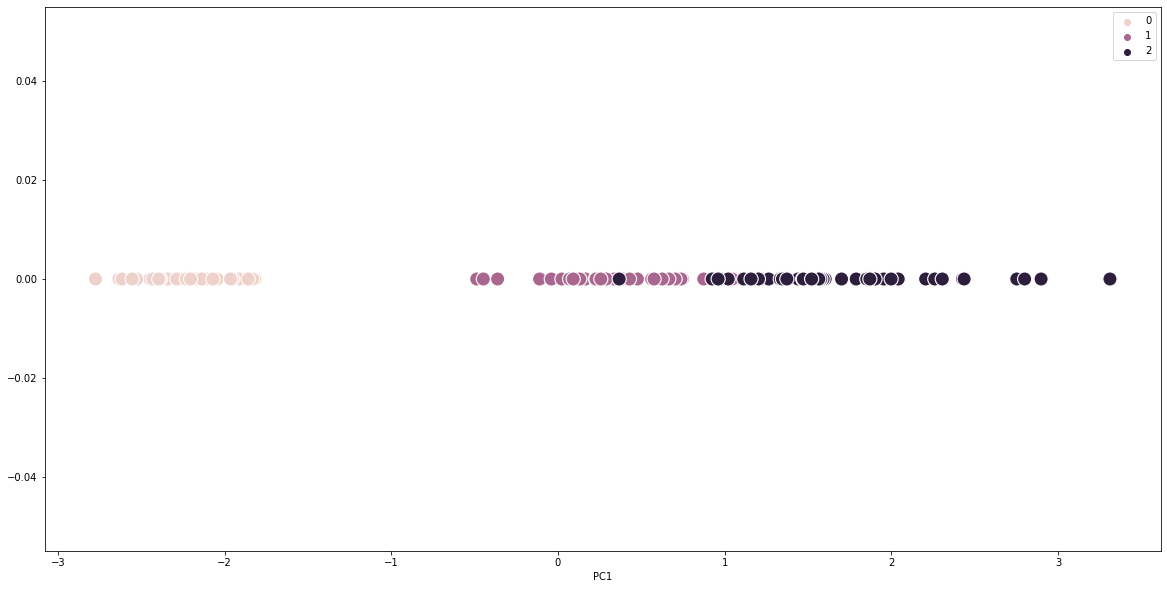

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.scatterplot(res['PC1'], [0] * len(res), hue=target, s=200, )
plt.title('')